# Linear regression for saturated vapour properties prediction

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data=pd.read_csv('superheated_vapor_properties.csv')
data.head()  

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,V,1.000,129200.0000,160640.0000,172180.0000,183720.0000,195270.0000,206810.0000,218350.0000,...,NaN,333730.00,NaN,356810.0000,NaN,379880.0000,NaN,402960.0000,NaN,426040.0000
1,1.0,U,29.334,2385.2000,2480.8000,2516.4000,2552.3000,2588.5000,2624.9000,2661.7000,...,NaN,3049.90,NaN,3132.4000,NaN,3216.7000,NaN,3302.6000,NaN,3390.3000
2,1.0,H,29.335,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.60,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
3,1.0,S,0.106,8.9767,9.3828,9.5136,9.6365,9.7527,9.8629,9.9679,...,NaN,10.82,NaN,10.9612,NaN,11.0957,NaN,11.2243,NaN,11.3476
4,10.0,V,1.010,14670.0000,16030.0000,17190.0000,18350.0000,19510.0000,20660.0000,21820.0000,...,NaN,33370.00,NaN,35670.0000,NaN,37980.0000,NaN,40290.0000,NaN,42600.0000


In [11]:
grouped=data.groupby(data.Property)
V_data=grouped.get_group("V")
V_data

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,V,1.000,129200.000,160640.0,172180.0,183720.0,195270.0,206810.0,218350.0,...,NaN,333730.000,NaN,356810.000,NaN,379880.000,NaN,402960.000,NaN,426040.000
4,10.0,V,1.010,14670.000,16030.0,17190.0,18350.0,19510.0,20660.0,21820.0,...,NaN,33370.000,NaN,35670.000,NaN,37980.000,NaN,40290.000,NaN,42600.000
8,20.0,V,1.017,7649.800,8000.0,8584.7,9167.1,9748.0,10320.0,10900.0,...,NaN,16680.000,NaN,17830.000,NaN,18990.000,NaN,20140.000,NaN,21300.000
12,30.0,V,1.022,5229.300,5322.0,5714.4,6104.6,6493.2,6880.8,7267.5,...,NaN,11120.000,NaN,11890.000,NaN,12660.000,NaN,13430.000,NaN,14190.000
16,40.0,V,1.027,3993.400,NaN,4279.2,4573.3,4865.8,5157.2,5447.8,...,NaN,8340.100,NaN,8917.600,NaN,9494.900,NaN,10070.000,NaN,10640.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,10600.0,V,1.474,16.778,NaN,NaN,NaN,NaN,NaN,NaN,...,26.276,27.834,29.313,30.732,32.106,33.444,34.753,36.039,37.304,38.552
528,10800.0,V,1.481,16.385,NaN,NaN,NaN,NaN,NaN,NaN,...,25.703,27.245,28.706,30.106,31.461,32.779,34.069,35.335,36.580,37.808
532,11000.0,V,1.489,16.006,NaN,NaN,NaN,NaN,NaN,NaN,...,25.151,26.676,28.120,29.503,30.839,32.139,33.410,34.656,35.882,37.091
536,11200.0,V,1.496,15.639,NaN,NaN,NaN,NaN,NaN,NaN,...,24.619,26.128,27.555,28.921,30.240,31.521,32.774,34.002,35.210,36.400


In [12]:
V_data[['Pressure','Liq_Sat']]

,Pressure,Liq_Sat
0,1.0,1.000
4,10.0,1.010
8,20.0,1.017
12,30.0,1.022
16,40.0,1.027
...,...,...
524,10600.0,1.474
528,10800.0,1.481
532,11000.0,1.489
536,11200.0,1.496


# specific volume of saturated liquid for Pressure < 300 kpa


In [14]:
 range1=V_data[(V_data.Pressure<300)].iloc[:,[0,2]]

In [15]:
range1

,Pressure,Liq_Sat
0,1.000,1.000
4,10.000,1.010
8,20.000,1.017
12,30.000,1.022
16,40.000,1.027
20,50.000,1.030
24,75.000,1.037
28,100.000,1.043
32,101.325,1.044
36,125.000,1.049


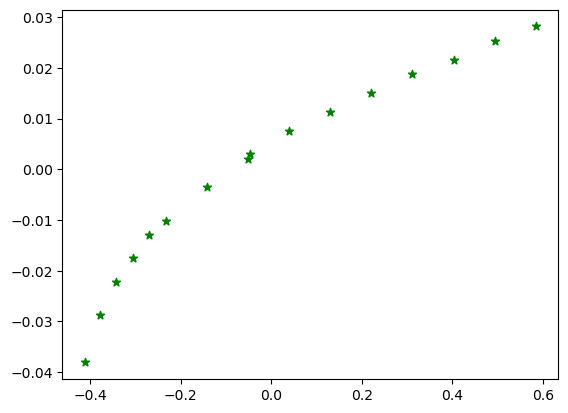

In [26]:
x=range1['Pressure']
x=(x-x.mean())/x.max()
y=range1['Liq_Sat']
y=(y-y.mean())/y.max()
plt.scatter(x, y,color='green',marker='*');

In [20]:
def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [21]:
def forward_pass(x,m,c):
    return m*x+c

In [22]:
L=[]
N=x.shape[0]

no of iterations: 0


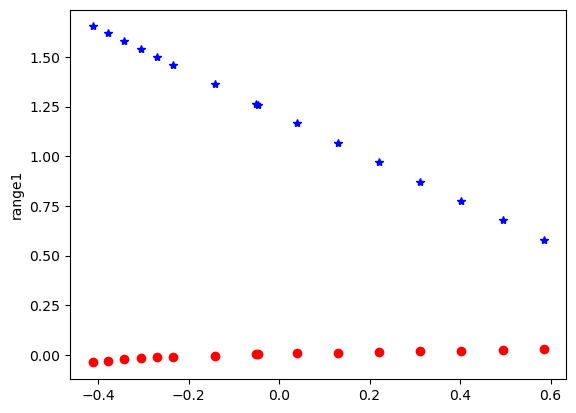

no of iterations: 5000


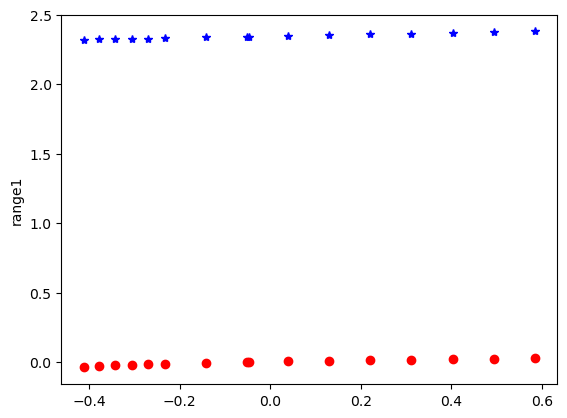

In [25]:
# Random Initialisation
m1 = np.random.randn(1)
c1 = np.random.randn(1)

# Hyperparameters
learningrate = 0.01
numiter = 10000

for i in range(numiter):
    # forward pass
    y_hat=forward_pass(x,m1,c1)
    # Loss
   
    # Gradient
    dm = (2.0/N) *  -np.sum(np.multiply(x,(y - (m1*x +c1))))
   
    dc = (2.0/N) * -np.sum(y - (m1*x + c1))
    
    m1 = m1 -learningrate * dm
    c1 = c1 - learningrate * dm
    if i%5000==0:
        L.append(loss(y_hat,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'ro')
        plt.plot(x,y_hat,'b*')
    #plt.plot(x,m1*x+c1,'r*')
        plt.ylabel('range1')
        plt.show()

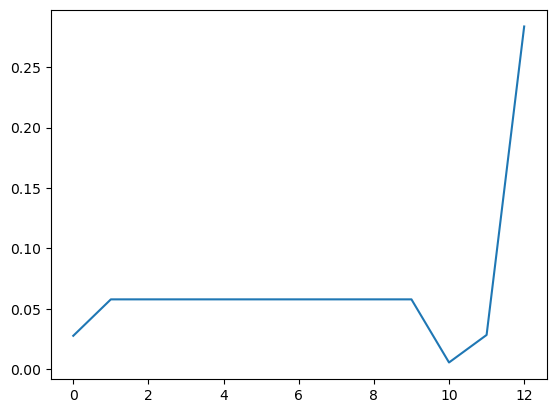

In [158]:
plt.plot(L)

# specific volume of saturated liquid for Pressure =>300 kpa and <1500

In [30]:
range2=V_data[(V_data.Pressure<=1500)&(V_data.Pressure>=300)].iloc[:,[0,2]]

In [31]:
range2

,Pressure,Liq_Sat
64,300.0,1.073
68,325.0,1.076
72,350.0,1.079
76,375.0,1.081
80,400.0,1.084
84,425.0,1.086
88,450.0,1.088
92,475.0,1.091
96,500.0,1.093
100,525.0,1.095


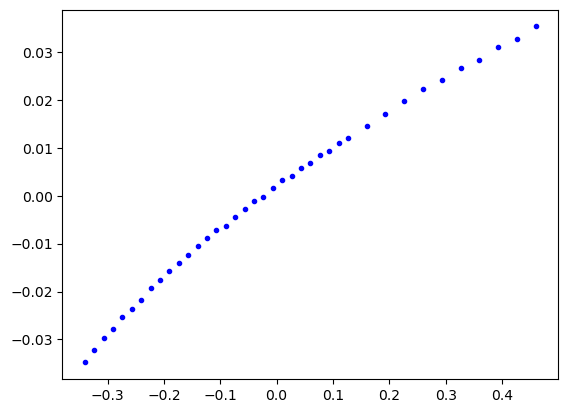

In [34]:
x=range2['Pressure']
x=(x-x.mean())/x.max()
y=range2['Liq_Sat']
y=(y-y.mean())/y.max()
plt.scatter(x, y,color='blue',marker='.');

no of iterations: 0


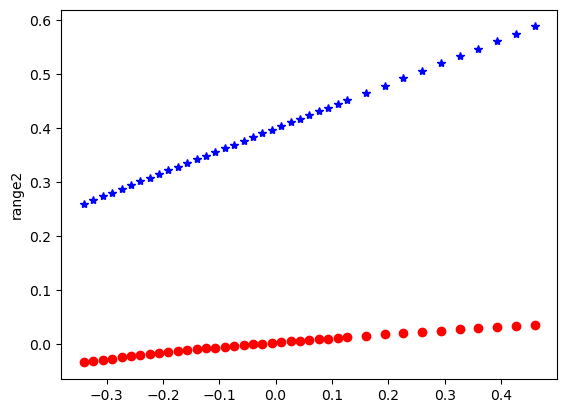

no of iterations: 5000


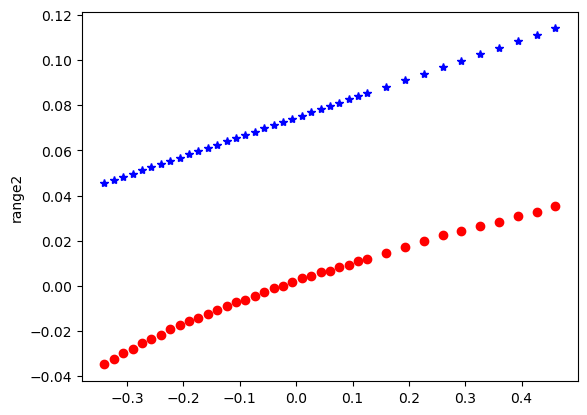

In [35]:
# Random Initialisation
m1 = np.random.randn(1)
c1 = np.random.randn(1)

# Hyperparameters
learningrate = 0.01
numiter = 10000

for i in range(numiter):
    # forward pass
    y_hat=forward_pass(x,m1,c1)
    # Loss
   
    # Gradient
    dm = (2.0/N) *  -np.sum(np.multiply(x,(y - (m1*x +c1))))
   
    dc = (2.0/N) * -np.sum(y - (m1*x + c1))
    
    m1 = m1 -learningrate * dm
    c1 = c1 - learningrate * dm
    if i%5000==0:
        L.append(loss(y_hat,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'ro')
        plt.plot(x,y_hat,'b*')
    #plt.plot(x,m1*x+c1,'r*')
        plt.ylabel('range2')
        plt.show()

# specific volume of saturated liquid for Pressure > 1500 kpa

In [36]:
range3=V_data[(V_data.Pressure>1500)].iloc[:,[0,2]]

In [37]:
range3

,Pressure,Liq_Sat
220,1550.0,1.156
224,1600.0,1.159
228,1650.0,1.161
232,1700.0,1.163
236,1750.0,1.166
...,...,...
524,10600.0,1.474
528,10800.0,1.481
532,11000.0,1.489
536,11200.0,1.496


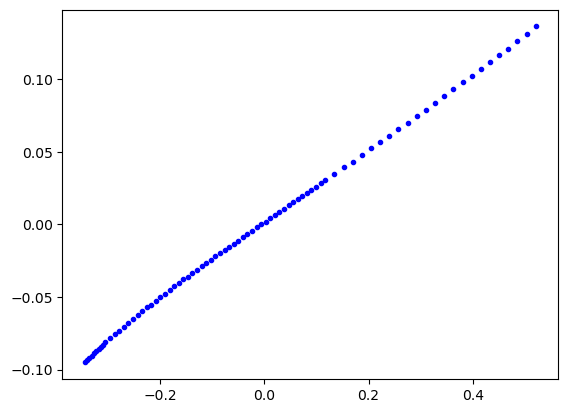

In [39]:
x=range3['Pressure']
x=(x-x.mean())/x.max()
y=range3['Liq_Sat']
y=(y-y.mean())/y.max()
plt.scatter(x, y,color='blue',marker='.');

no of iterations: 0


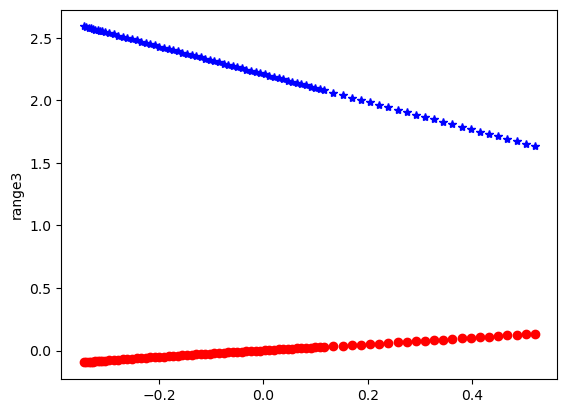

no of iterations: 5000


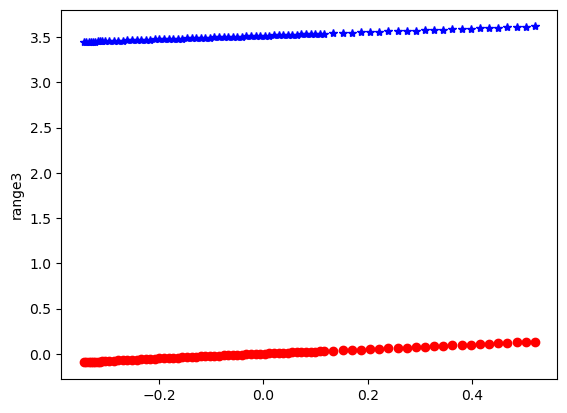

In [40]:
# Random Initialisation
m1 = np.random.randn(1)
c1 = np.random.randn(1)

# Hyperparameters
learningrate = 0.001
numiter = 10000

for i in range(numiter):
    # forward pass
    y_hat=forward_pass(x,m1,c1)
    # Loss
   
    # Gradient
    dm = (2.0/N) *  -np.sum(np.multiply(x,(y - (m1*x +c1))))
   
    dc = (2.0/N) * -np.sum(y - (m1*x + c1))
    
    m1 = m1 -learningrate * dm
    c1 = c1 - learningrate * dm
    if i%5000==0:
        L.append(loss(y_hat,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'ro')
        plt.plot(x,y_hat,'b*')
    #plt.plot(x,m1*x+c1,'r*')
        plt.ylabel('range3')
        plt.show()

# by sklearn implementation

In [41]:
from sklearn import linear_model
from sklearn.metrics import r2_score

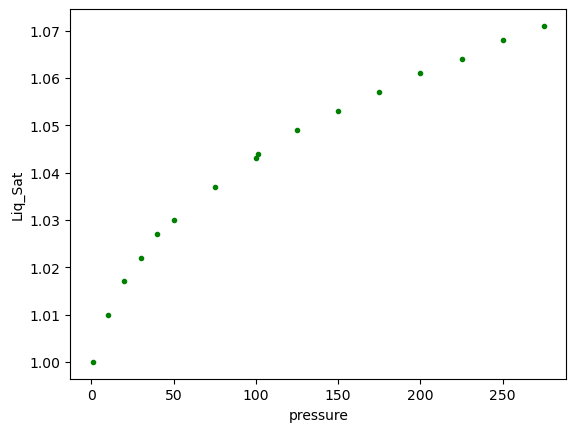

In [42]:
plt.xlabel('pressure')
plt.ylabel('Liq_Sat')
plt.scatter(range1.Pressure,range1.Liq_Sat,color='green',marker='.')

In [44]:
reg=linear_model.LinearRegression()
reg.fit(range1[['Pressure']],range1.Liq_Sat)

LinearRegression()

In [45]:
reg.coef_

array([0.00023137])

In [46]:
reg.intercept_

1.0143878627679743

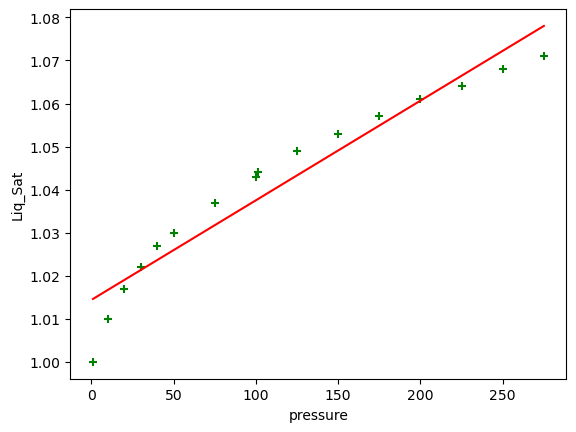

In [48]:
%matplotlib inline
plt.xlabel('pressure')
plt.ylabel('Liq_Sat')
plt.scatter(range1.Pressure,range1.Liq_Sat,color='green',marker='+')
plt.plot(range1.Pressure,reg.predict(range1[['Pressure']]),color='red')

In [49]:
r2_score(range1.Pressure,range1.Liq_Sat)

-1.7042942829583545

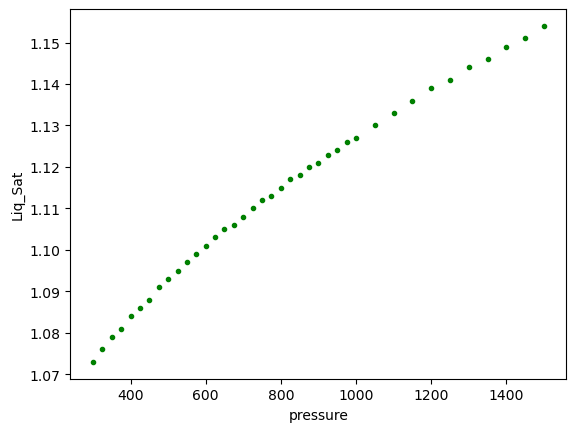

In [50]:
plt.xlabel('pressure')
plt.ylabel('Liq_Sat')
plt.scatter(range2.Pressure,range2.Liq_Sat,color='green',marker='.')

In [182]:
reg=linear_model.LinearRegression()
reg.fit(range2[['Pressure']],range2.Liq_Sat)

LinearRegression()

In [183]:
reg.coef_

array([6.59249881e-05])

In [184]:
reg.intercept_

1.0597633429690072

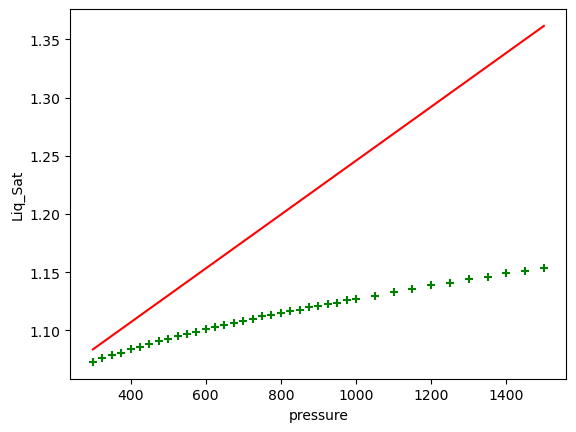

In [51]:
%matplotlib inline
plt.xlabel('pressure')
plt.ylabel('Liq_Sat')
plt.scatter(range2.Pressure,range2.Liq_Sat,color='green',marker='+')
plt.plot(range2.Pressure,reg.predict(range2[['Pressure']]),color='red')

In [186]:
r2_score(range2.Pressure,range2.Liq_Sat)

-5.82997167801306

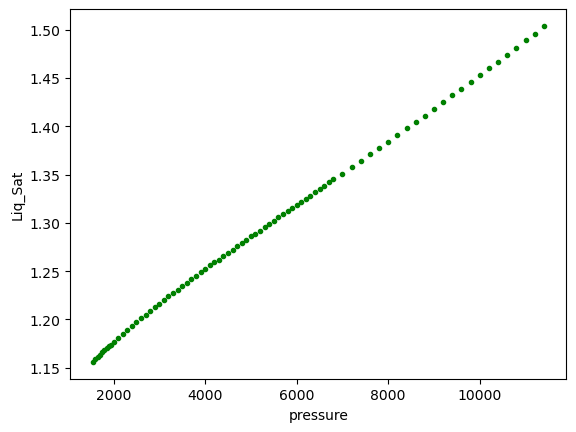

In [52]:
plt.xlabel('pressure')
plt.ylabel('Liq_Sat')
plt.scatter(range3.Pressure,range3.Liq_Sat,color='green',marker='.')

In [188]:
reg=linear_model.LinearRegression()
reg.fit(range2[['Pressure']],range2.Liq_Sat)

LinearRegression()

In [189]:
reg.coef_

array([6.59249881e-05])

In [190]:
reg.intercept_

1.0597633429690072

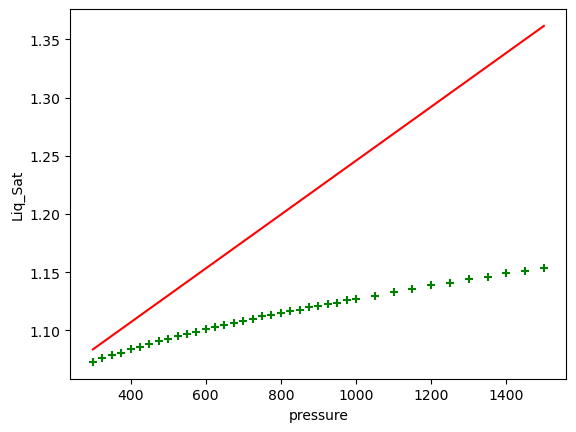

In [53]:
%matplotlib inline
plt.xlabel('pressure')
plt.ylabel('Liq_Sat')
plt.scatter(range2.Pressure,range2.Liq_Sat,color='green',marker='+')
plt.plot(range2.Pressure,reg.predict(range2[['Pressure']]),color='red')

In [54]:
r2_score(range3.Pressure,range3.Liq_Sat)

-3.7872529660567